In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()


data = open('songs.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)      

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
15462/15462 [==============================] - 100s 6ms/sample - loss: 6.9156 - acc: 0.0196s - loss: 6.9156 - acc: 0.019
Epoch 2/100
15462/15462 [==============================] - 119s 8ms/sample - loss: 6.4999 - acc: 0.0220
Epoch 3/100
15462/15462 [==============================] - 118s 8ms/sample - loss: 6.3896 - acc: 0.0236
Epoch 4/100
15462/15462 [==============================] - 92s 6ms/sample - loss: 6.2690 - acc: 0.02993s - loss:
Epoch 5/100
15462/15462 [==============================] - 89s 6ms/sample - loss: 6.1776 - acc: 0.0347
Epoch 6/100
15462/15462 [==============================] - 91s 6ms/sample - loss: 6.0998 - acc: 0.03850s - loss: 6.1000 - acc: 
Epoch 7/100
15462/15462 [==============================] - 95s 6ms/sample - loss: 6.0189 - acc: 0.0409
Epoch 8/100
15462/15462 [==============================] - 101s 7ms/sample - loss: 5.9328 - acc: 0.0421
Epoch 9/100
15462/15462 [==============================] - 1

15462/15462 [==============================] - 100s 6ms/sample - loss: 1.5358 - acc: 0.7345s - loss: 1.5313 - acc: 0 - ETA: 1s - loss: 1.5333 - a
Epoch 72/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.5120 - acc: 0.7392
Epoch 73/100
15462/15462 [==============================] - 114s 7ms/sample - loss: 1.4908 - acc: 0.7418
Epoch 74/100
15462/15462 [==============================] - 124s 8ms/sample - loss: 1.4751 - acc: 0.7445
Epoch 75/100
15462/15462 [==============================] - 119s 8ms/sample - loss: 1.4575 - acc: 0.7478
Epoch 76/100
15462/15462 [==============================] - 111s 7ms/sample - loss: 1.4357 - acc: 0.7513
Epoch 77/100
15462/15462 [==============================] - 99s 6ms/sample - loss: 1.4242 - acc: 0.7501
Epoch 78/100
15462/15462 [==============================] - 101s 7ms/sample - loss: 1.4261 - acc: 0.7529
Epoch 79/100
15462/15462 [==============================] - 118s 8ms/sample - loss: 1.3840 - acc: 0.7643
Epoch 80/100
154

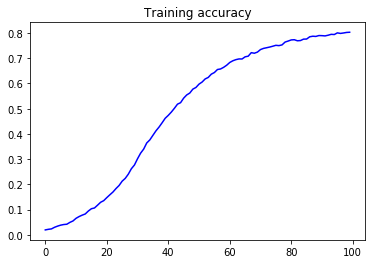

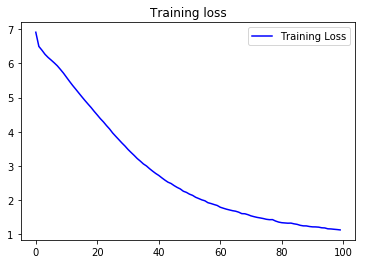

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope with nature's end did stand control hate name old hate bearing rest store all rest stand young o'er name write o'er many stay some rest give none grow thence hate rage part go about about dearer show groan ' can keep them thee was bright ' so skill tongue bright store so pen bearing effect away held days live o'er might expire expire dote expire show thine ' another sight so can none admire sits grow new torn mother decrease o'er hate light about rage ill show thine muse mistaking abuse me but so much near slain ' lived so
